Cross-validation scores: [0.97663746 0.97121402 0.97496871 0.97204839 0.97705465]
Mean CV score: 0.9744 (+/- 0.0047)
Accuracy: 0.9736

Classification Report:
              precision    recall  f1-score   support

       apple       0.99      1.00      1.00       129
      banana       0.98      1.00      0.99       121
   blackgram       0.95      0.95      0.95       132
    chickpea       1.00      1.00      1.00       136
     coconut       1.00      0.99      0.99       153
      coffee       0.99      0.99      0.99       141
      cotton       0.98      1.00      0.99       136
      grapes       1.00      0.99      1.00       136
        jute       0.84      0.89      0.86       151
 kidneybeans       0.98      1.00      0.99       129
      lentil       0.95      0.93      0.94       134
       maize       1.00      0.96      0.98       139
       mango       1.00      1.00      1.00       150
   mothbeans       0.92      0.99      0.95       135
    mungbean       0.99      0.

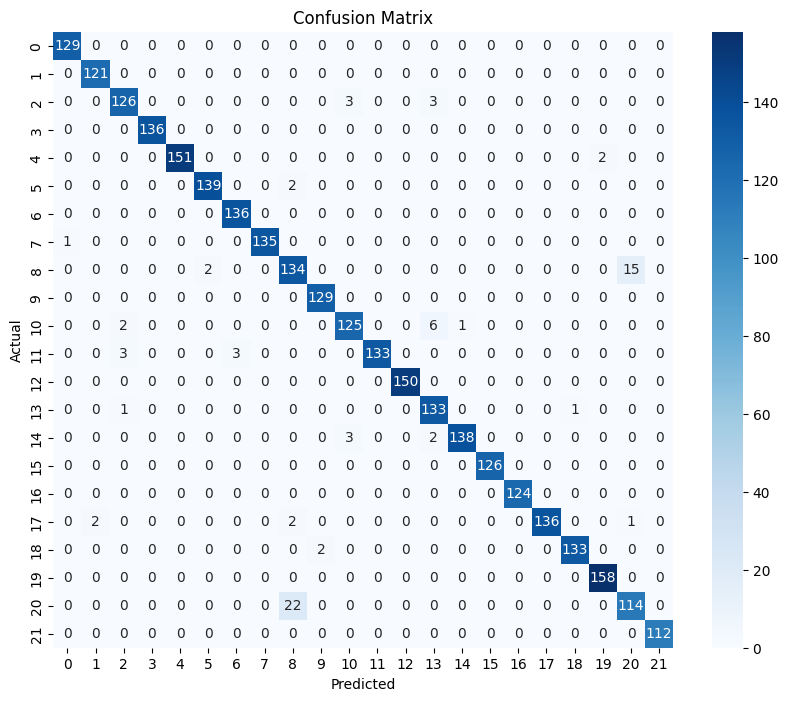

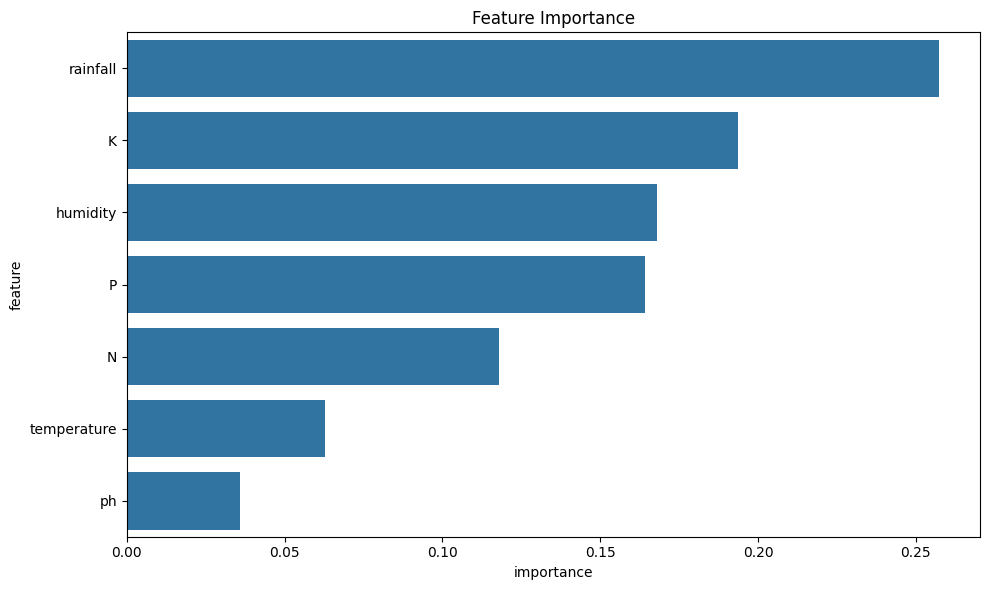


Prediction for new data:
rice


c:\Users\shahp\OneDrive\Desktop\New folder\ipd\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

data = pd.read_csv('2.csv')
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

rf = RandomForestClassifier()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    new_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    new_data_scaled = scaler.transform(new_data)
    prediction = best_rf.predict(new_data_scaled)
    return prediction[0]


joblib.dump(best_rf, 'rf.pkl')
print("\nPrediction for new data:")
print(predict_crop(90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362))

Cross-validation scores: [0.96745932 0.97246558 0.97455152 0.97329996 0.96954526]
Mean CV score: 0.9715 (+/- 0.0052)
Accuracy: 0.9703

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      0.99      1.00       147
      banana       0.99      1.00      1.00       129
   blackgram       0.95      0.96      0.95       131
    chickpea       1.00      1.00      1.00       158
     coconut       0.99      0.97      0.98       135
      coffee       0.99      1.00      0.99       132
      cotton       0.95      0.99      0.97       140
      grapes       0.99      1.00      1.00       135
        jute       0.83      0.86      0.85       138
 kidneybeans       1.00      1.00      1.00       146
      lentil       0.92      0.93      0.93       144
       maize       0.99      0.95      0.97       143
       mango       1.00      1.00      1.00       131
   mothbeans       0.95      0.94      0.94       127
    mungbean       0.98      0.

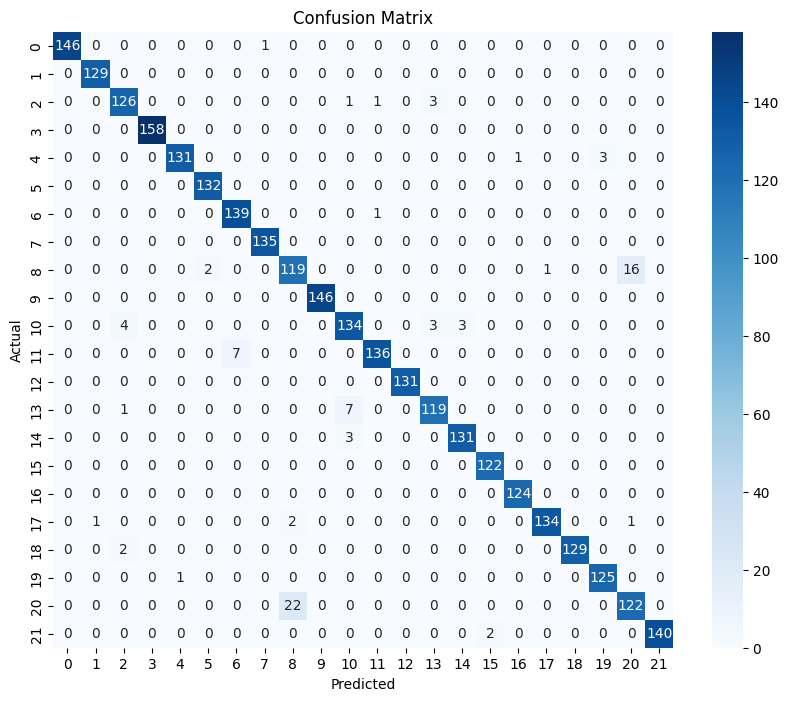


Prediction for new data:
rice


c:\Users\shahp\OneDrive\Desktop\New folder\ipd\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
data = pd.read_csv('2.csv')
X = data.drop('label', axis=1)
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC()

param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(svm, param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_svm = random_search.best_estimator_

cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    new_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    new_data_scaled = scaler.transform(new_data)
    prediction = best_svm.predict(new_data_scaled)
    return prediction[0]

print("\nPrediction for new data:")
joblib.dump(best_svm, 'svm.pkl')
print(predict_crop(90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
import joblib

# Load the dataset
data = pd.read_csv('2.csv')
X = data.drop('label', axis=1)
y = data['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_seed=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_dist, 
                                   n_iter=20, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_catboost = random_search.best_estimator_

# Cross-validation scores
cv_scores = cross_val_score(best_catboost, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Make predictions
y_pred = best_catboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Prediction function
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    new_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    new_data_scaled = scaler.transform(new_data)
    prediction = best_catboost.predict(new_data_scaled)
    return prediction[0]

# Save the model
joblib.dump(best_catboost, 'catboost_model.pkl')

# Example prediction
print("\nPrediction for new data:")
print(predict_crop(90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362))


In [ ]:
import pandas as pd
import numpy as np

def add_noise(data, noise_level=0.05):
    noisy_data = data.copy()
    for column in noisy_data.columns[:-1]:  
        if noisy_data[column].dtype != 'object':
            noise = np.random.normal(0, noise_level, size=noisy_data[column].shape)
            noisy_data[column] += noise * noisy_data[column]
    return noisy_data

def scale_features(data, scale_range=(0.9, 1.1)):
    scaled_data = data.copy()
    for column in scaled_data.columns[:-1]:  
        if scaled_data[column].dtype != 'object':
            scale_factor = np.random.uniform(*scale_range, size=scaled_data[column].shape)
            scaled_data[column] *= scale_factor
    return scaled_data

def generate_synthetic_data(data, samples_per_class):
    synthetic_data = pd.DataFrame()
    for crop in data['label'].unique():
        crop_data = data[data['label'] == crop]
        for _ in range(samples_per_class - len(crop_data)):
            noisy_data = add_noise(crop_data.sample(1))
            scaled_data = scale_features(noisy_data)
            synthetic_data = pd.concat([synthetic_data, scaled_data], ignore_index=True)
    return synthetic_data

file_path = '1.csv'
data = pd.read_csv(file_path)

num_classes = len(data['label'].unique())
samples_per_class = 15000 // num_classes

synthetic_data = generate_synthetic_data(data, samples_per_class)

augmented_data = pd.concat([data, synthetic_data], ignore_index=True)

augmented_data = augmented_data.sample(frac=1).reset_index(drop=True)

augmented_data.to_csv('2.csv', index=False)

print("Total samples in augmented dataset:", len(augmented_data))
print("\nClass distribution in augmented dataset:")
print(augmented_data['label'].value_counts())

if len(augmented_data) > 20000:
    augmented_data = augmented_data.sample(n=20000, random_state=42)
elif len(augmented_data) < 10000:
    additional_samples_needed = 10000 - len(augmented_data)
    additional_samples = augmented_data.sample(n=additional_samples_needed, replace=True, random_state=42)
    augmented_data = pd.concat([augmented_data, additional_samples], ignore_index=True)

augmented_data.to_csv('2.csv', index=False)

print("\nFinal dataset size:", len(augmented_data))
print("\nFinal class distribution:")
print(augmented_data['label'].value_counts())

Ensemble Accuracy: 0.9770

Ensemble Classification Report:
              precision    recall  f1-score   support

       apple       0.99      1.00      1.00       147
      banana       1.00      1.00      1.00       129
   blackgram       0.98      0.97      0.97       131
    chickpea       1.00      1.00      1.00       158
     coconut       1.00      0.99      1.00       135
      coffee       0.99      0.99      0.99       132
      cotton       0.96      0.99      0.98       140
      grapes       1.00      0.99      1.00       135
        jute       0.83      0.89      0.86       138
 kidneybeans       1.00      1.00      1.00       146
      lentil       0.96      0.94      0.95       144
       maize       0.99      0.96      0.97       143
       mango       0.99      1.00      1.00       131
   mothbeans       0.95      0.97      0.96       127
    mungbean       0.99      0.99      0.99       134
   muskmelon       1.00      1.00      1.00       122
      orange       1.0

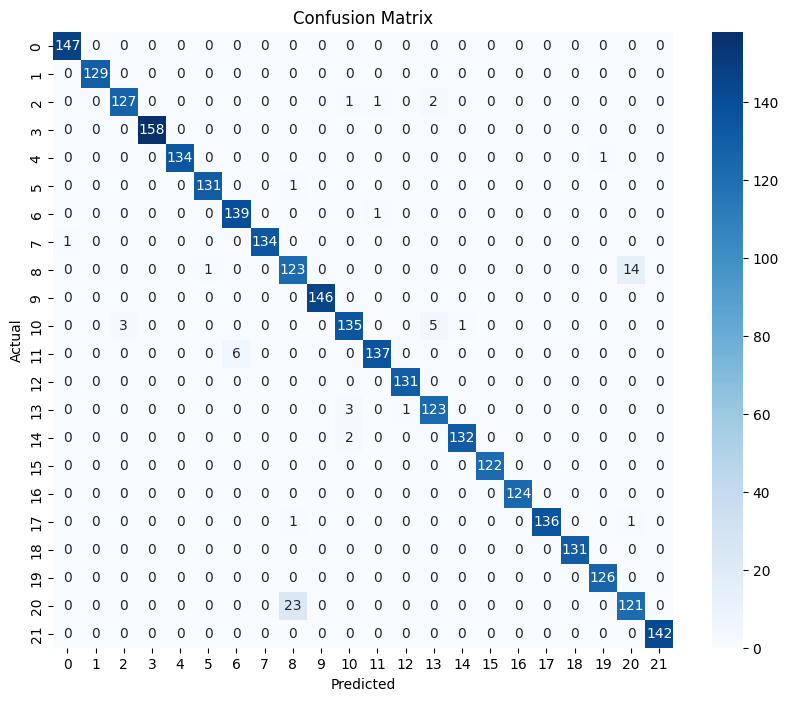

Ensemble model and scaler saved as 'ensemble_model.pkl' and 'scaler.pkl'


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('2.csv')
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('svm', svm), ('gb', gb)],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)

y_pred = ensemble.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.4f}")

print("\nEnsemble Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

joblib.dump(ensemble, 'ensemble_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Ensemble model and scaler saved as 'ensemble_model.pkl' and 'scaler.pkl'")